In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import os
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions

In [2]:
# with open("/data/ongh0068/l1000/l1000_biaae/protein_target_to_l1000_smiles.pkl", 'rb') as f:
with open("protein_target_to_l1000_smiles.pkl", 'rb') as f:
    meta_data = pickle.load(f)
meta_data

{'AKT1': ['O=C1N=C(NCc2cccs2)SC1=Cc1ccc2ncccc2c1',
  'Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)c3)cc12',
  'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OCC3CCCNC3)c21'],
 'AKT2': ['CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OCC3CCCNC3)c21',
  'Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)c3)cc12'],
 'AURKB': ['CCn1cc(-c2ccnc3[nH]c(-c4cccc(CN(C)C)c4)cc23)c(-c2ccc(NC(=O)N(C)C)cc2)n1'],
 'EGFR': ['CC(C)(C)c1cc(C=C(C#N)C#N)cc(C(C)(C)C)c1O',
  'Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1',
  'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1',
  'CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OC1CCOC1',
  'COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC',
  'O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc21',
  'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1',
  'C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC)ncc2Cl)c1',
  'C=CC(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1',
  'CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)C=CCN(C)C',
  'C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1',

In [3]:
n = 0
for v in meta_data.values():
    n += len(v)

n

34

## Make an inv meta data dict for target look up

In [4]:
# this is wrong since some drugs target at different genes
inv_meta_data_wrong = {v:k for k, vs in meta_data.items() for v in vs}
len(inv_meta_data_wrong.keys())

32

In [5]:
inv_meta_data = {}
for k,v in meta_data.items():
    for x in v:
        inv_meta_data.setdefault(x, []).append(k)
        
# inv_meta_data

# Test

## Single ligand

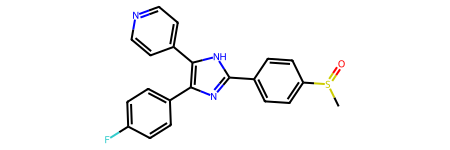

In [39]:
m = Chem.MolFromSmiles('CS(=O)c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc3)[nH]2)cc1')
m

In [40]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

 27 30  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8817   -1.2135    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3083   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.5218   -1.6317    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.8921   -1.0216    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -9.1056   -1.9033    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -8.9488   -3.3950    0

In [43]:
m1 = Chem.AddHs(m)
AllChem.EmbedMolecule(m1,randomSeed=2023)
# print(Chem.MolToMolBlock(m1), file=open('ligand/test_mol.sdf', 'w+'))

0

## A set of ligands (2 mols)

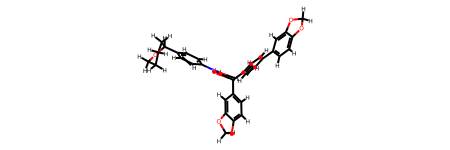

In [44]:
mm = Chem.MolFromSmiles('O=C(NC1=CC=C(C2CCCCO2)C=C1)C(C1=CC=C(C2=CC=C3OCOC3=C2)C=C1)C1=CC=C2OCOC2=C1')
mm1 = Chem.AddHs(mm)
AllChem.EmbedMolecule(mm1,randomSeed=2023)
mm1

In [45]:
mols = [m1, mm1]
with Chem.SDWriter('ligand/test_mols.sdf') as w:
  for m in mols:
    w.write(m)

In [46]:
!gnina -r protein/2uzr.pdb -l ligand/test_mols.sdf --autobox_ligand protein/2uzr.pdb -o whole_docked.sdf.gz --exhaustiveness 64 --log test.log

              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina  master:3958375   Built Sep 18 2023.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Commandline: gnina -r protein/2uzr.pdb -l ligand/test_mols.sdf --autobox_ligand protein/2uzr.pdb -o whole_docked.sdf.gz --exhaustiveness 64 --log test.log
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

Using random seed: 508126347

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |  affinity  |    CNN     |   CNN
     | (kcal/mol) | pose score | affinity
---

# Save original mols in L1000

## check for isomers

In [6]:
opts = StereoEnumerationOptions(tryEmbedding=True, unique=True)
for smi in tqdm(inv_meta_data.keys()):
    m = Chem.MolFromSmiles(smi)
    isomers = tuple(EnumerateStereoisomers(m, options=opts))
    isomers = [Chem.AddHs(i) for i in isomers]
    with Chem.SDWriter('ligand/original/' + smi + '.sdf') as w:
        for isomer in isomers:
            AllChem.EmbedMolecule(isomer,randomSeed=2023)
            w.write(isomer)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:03<00:00,  8.40it/s]


In [6]:
# without checking for isomers

# for smi in tqdm(inv_meta_data.keys()):
#     m = Chem.MolFromSmiles(smi)
#     mm = Chem.AddHs(m)
#     AllChem.EmbedMolecule(mm,randomSeed=2023)
#     print(Chem.MolToMolBlock(mm), file=open('ligand/original/' + smi + '.sdf', 'w+'))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 238/238 [00:07<00:00, 33.25it/s]


# Save generated mols

In [12]:
model = 'aae'

In [13]:
# aae_file = '../ldm/cond_generation_res/ldm_con_' + model + '_generated_molecules_and_sa_scores.pkl'
aae_file = 'cond_generation_res/ldm_con_' + model + '_generated_molecules_and_sa_scores.pkl'
with open(aae_file, 'rb') as f:
    aae_mols = pickle.load(f)

aae_mols

{'CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1_2441': {'generated_mols': [<rdkit.Chem.rdchem.RWMol at 0x7f5f9dc27ea0>,
  'generated_smiles': ['O=C(COC1=CC=C(C2=CC=CC=C2)C=C1)NN1CCNCC1',
   'C1=CC=C(N2CCN(C3=CC=C4N=C(C5=CC=CS5)C(C5=CC=CN=C5)=NC4=C3)CC2)C=C1',
   'C1=CN=CN=C1.O=C(NC1=CC=C2OCOC2=C1)C1=CC=C(C2=CC=C3N=C(C4=CC=C5OCOC5=C4)N=C(C4=CC=C5OCOC5=C4)C3=C2)C=C1',
   'CCCNC(=O)C1=CC=C(Br)C=C1NC(=O)CSC1=CC=C(C(=O)NC2=CC=C(OC(F)(F)F)C=C2)C=C1',
   'O=CNC1=C(O)C(O)=C(OO)C=C1NC(=O)N1CCC(=O)CC1',
   'O=C(NCCCN1CCCCC1)C1=NOC(C2=C(Cl)NN=C2)=C1NC(=O)N1CCN(C2=CNN=C2C2=CC=CC=C2)CC1',
   'CN(CC1=CC=CS1)C(=O)C1(C(=O)NC2=CC=C(C3=NOC(C4=CC=CC=N4)=N3)C=C2N2CCC(C(N)=O)CC2)CCC1',
   'CC(=O)NC1=CC=C(N2CCN(C3=CC=C(C(=O)NC4=CC=C(NC(=O)NC5=CC=C(C(F)(F)F)C=C5)C=C4)C=C3C(F)(F)F)CC2)C=C1',
   'O=C(COC1=CC=C(C2=CC=CN=C2)C=C1)NC(CCS)C(=S)NC1=NC=CC=N1',
   'O=S(O)(O)(SSSSC1=NC2=CC=C(C3=CC=C(O)C=C3)C=C2N=C1)N1CCNCC1',
   'O=C(NCC1=CC=C2OCOC2=C1)C1=C(C2=CC=C3OCOC3=C2)C(C2=CC=CC=C2)=NC2=C(C3=CC=C4OCOC4=C3)C(C3=CC=CC=C

In [14]:
from collections import defaultdict
aae_org = defaultdict(lambda: [])
for k, v in aae_mols.items():
    ref_smi = k.split('_')[0]
#     if ref_smi == 'Nc1ccccc1NC(=O)c1ccc(CNc2nccc(-c3cccnc3)n2)cc1':
#         print(k, v)
    aae_org[ref_smi] += v['generated_mols']
# aae_org

In [16]:
len(aae_org.keys()), aae_org.keys()

(24,
 dict_keys(['CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1', 'CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1', 'Cc1[nH]c2ccccc2c1CCNCc1ccc(C=CC(=O)NO)cc1', 'CC(=O)Nc1ccc(C(=O)Nc2cc(-c3cccs3)ccc2N)cc1', 'CN(C)Cc1c(C(=O)NCCOc2ccc(C(=O)NO)cc2)oc2ccccc12', 'O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc21', 'CCN(CC)Cc1ccc2cc(COC(=O)Nc3ccc(C(=O)NO)cc3)ccc2c1', 'O=C(C=Cc1cccc(S(=O)(=O)Nc2ccccc2)c1)NO', 'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1', 'CCn1cc(-c2ccnc3[nH]c(-c4cccc(CN(C)C)c4)cc23)c(-c2ccc(NC(=O)N(C)C)cc2)n1', 'CC(C)(C)c1cc(C=C(C#N)C#N)cc(C(C)(C)C)c1O', 'C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1', 'CC(=O)Nc1ccc(C(=O)Nc2ccccc2N)cc1', 'O=C(C=Cc1ccc(CN(CCO)CCc2c[nH]c3ccccc23)cc1)NO', 'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1', 'CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OC1CCOC1', 'COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC', 'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1', 'C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC)ncc2Cl)c1', 'Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2

In [35]:
for ref_smi, mols in tqdm(aae_org.items()):
    with Chem.SDWriter('ligand/aae/'+ref_smi+'.sdf') as w:
      for m in mols:
        m = Chem.AddHs(m)
        AllChem.EmbedMolecule(m,randomSeed=2023)
        w.write(m)

  0%|                                                                                                                                                   | 0/212 [00:11<?, ?it/s]


KeyboardInterrupt: 

## select 100 mols for a few ref smiles
the ref mols have high binding affinity with target protein

### how to find the best affinity among isomers

In [12]:
from math import ceil

In [10]:
with open('logs/original/AKT1/CN1CCC(c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)C(O)C1.log', 'r') as f:
    lines = f.readlines()
lines = lines[16:]
lines

['mode |  affinity  |    CNN     |   CNN\n',
 '     | (kcal/mol) | pose score | affinity\n',
 '-----+------------+------------+----------\n',
 '    1       -6.59       0.5302      5.081\n',
 '    2       -6.72       0.5179      5.201\n',
 '    3       -6.22       0.4632      4.848\n',
 '    4       -6.14       0.4443      5.088\n',
 '    5       -5.52       0.4419      5.412\n',
 '    6       -5.68       0.4293      5.124\n',
 '    7       -6.75       0.3889      4.939\n',
 '    8       -6.53       0.3387      4.501\n',
 '    9       -6.83       0.2763      5.180\n',
 'Using random seed: -202293064\n',
 '\n',
 'mode |  affinity  |    CNN     |   CNN\n',
 '     | (kcal/mol) | pose score | affinity\n',
 '-----+------------+------------+----------\n',
 '    1       -6.79       0.6149      4.879\n',
 '    2       -5.84       0.5924      4.972\n',
 '    3       -5.75       0.4858      5.283\n',
 '    4       -5.79       0.4499      5.510\n',
 '    5       -5.58       0.4304      4.648\n',
 

In [14]:
n = ceil(len(lines)/14)
n

4

In [16]:
arr = np.zeros(n)
for i in range(n):
    arr[i] = float(lines[i*14+3][11:17])
print(arr)
tmp_best = np.min(arr)
tmp_best

[-6.59 -6.79 -6.74 -6.64]


-6.79

### find the perturbagen with the best binding affinity for each protein target

In [17]:
proteins = ['AKT1', 'AKT2', 'AURKB', 'EGFR', 'PIK3CA', 'SMAD3', 'HDAC1', 'TP53', 'MTOR']
# proteins = ['EGFR', 'PIK3CA', 'SMAD3', 'HDAC1']
# proteins = ['HDAC1', 'MTOR']
# proteins = ['AKT1']
log_path = 'logs/original/'

In [24]:
ref_dict = {}

for pr in proteins:
    ref_dict[pr] = {}
    best = 0.0
    best_smi = ''
    for file_name in os.listdir(log_path+pr):
        with open(os.path.join(log_path + pr, file_name), 'r') as f:
            lines = f.readlines()
#         score = float(lines[19][11:17])
        lines = lines[16:]
        n = ceil(len(lines)/14)
        arr = np.zeros(n)
        for i in range(n):
            arr[i] = float(lines[i*14+3][11:17])
        score = np.min(arr)
        smi = file_name.split('.')[0]
        if score < best and smi in aae_org.keys():
            best = score
            best_smi = smi
    print('protein ', pr, 'best score ', best)
    ref_dict[pr]['score'] = best
    ref_dict[pr]['smiles'] = best_smi

protein  AKT1 best score  -6.79
protein  AKT2 best score  -7.98
protein  AURKB best score  -9.49
protein  EGFR best score  -9.6
protein  PIK3CA best score  -7.91
protein  SMAD3 best score  -7.94
protein  HDAC1 best score  -6.79
protein  TP53 best score  -8.24
protein  MTOR best score  -9.26


In [96]:
ref_dict['AKT1']['smiles'] == ref_dict['EGFR']['smiles']

True

In [25]:
ref_df = pd.DataFrame(ref_dict)
ref_df

,AKT1,AKT2,AURKB,EGFR,PIK3CA,SMAD3,HDAC1,TP53,MTOR
score,-6.79,-7.98,-9.49,-9.6,-7.91,-7.94,-6.79,-8.24,-9.26
smiles,CN1CCC(c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)C...,O=C(O)c1ccc(Nc2ncc3c(n2)-c2ccc(Cl)cc2C(c2c(F)c...,CC(Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)ccc(F...,CN1CCC(c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)C...,CNC(=O)Nc1ccc(-c2nc(N3CC4CCC(C3)O4)c3cnn(C4CCC...,NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl,Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1,Cn1cc(C2=C(c3cn(C4CCN(Cc5ccccn5)CC4)c4ccccc34)...,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12


In [26]:
for k, v in ref_dict.items():
    print(k, v['smiles'])

AKT1 CN1CCC(c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)C(O)C1
AKT2 O=C(O)c1ccc(Nc2ncc3c(n2)-c2ccc(Cl)cc2C(c2c(F)cccc2F)=NC3)cc1
AURKB CC(Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)ccc(F)c1Cl
EGFR CN1CCC(c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)C(O)C1
PIK3CA CNC(=O)Nc1ccc(-c2nc(N3CC4CCC(C3)O4)c3cnn(C4CCC5(CC4)OCCO5)c3n2)cc1
SMAD3 NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl
HDAC1 Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1
TP53 Cn1cc(C2=C(c3cn(C4CCN(Cc5ccccn5)CC4)c4ccccc34)C(=O)NC2=O)c2ccccc21
MTOR O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12


In [92]:
# selected = {
#     'O=[N+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc3)[nH]2)cc1': 'AKT1', 
#     'CN1CCC(c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)C(O)C1': 'EGFR', 
#     'Cn1cc(C2=C(c3cn(C4CCN(Cc5ccccn5)CC4)c4ccccc34)C(=O)NC2=O)c2ccccc21': 'TP53',
#     'CNC(=O)Nc1ccc(-c2nc(N3CC4CCC(C3)O4)c3cnn(C4CCC5(CC4)OCCO5)c3n2)cc1': 'PIK3CA'
# }


selected = {v['smiles']:k for k, v in ref_dict.items()}
selected

{'CN1CCC(c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)C(O)C1': 'EGFR',
 'O=C(O)c1ccc(Nc2ncc3c(n2)-c2ccc(Cl)cc2C(c2c(F)cccc2F)=NC3)cc1': 'AKT2',
 'CC(Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)ccc(F)c1Cl': 'AURKB',
 'CNC(=O)Nc1ccc(-c2nc(N3CC4CCC(C3)O4)c3cnn(C4CCC5(CC4)OCCO5)c3n2)cc1': 'PIK3CA',
 'NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl': 'SMAD3',
 'Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1': 'HDAC1',
 'Cn1cc(C2=C(c3cn(C4CCN(Cc5ccccn5)CC4)c4ccccc34)C(=O)NC2=O)c2ccccc21': 'TP53',
 'O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12': 'MTOR'}

**problem:** some molecules may not be able to embed into 3D space
> don't sample 100 in advance, stop writing until there are 100 mols

In [95]:
opts = StereoEnumerationOptions(tryEmbedding=True, unique=True)

for ref_smi, pr in selected.items():
#     if pr in ['AKT1', 'EGFR', 'TP53', 'PIK3CA']:
#         continue
    print(pr)
    mols = aae_org[ref_smi]
    np.random.seed(2023)
    np.random.shuffle(mols)
    selected_mols = mols
#     selected_mols = np.random.choice(mols, 100)
    print(len(selected_mols))
    os.makedirs(os.path.join('ligand', model, ref_smi), exist_ok=True)

    counter = 0
    for m in tqdm(selected_mols):
        if counter >= 100:
            break
        name = Chem.MolToSmiles(m)
        isomers = tuple(EnumerateStereoisomers(m, options=opts))    # some may fail to embed??
        if len(isomers) == 0:
            continue
        isomers = [Chem.AddHs(i) for i in isomers]
        for i in isomers:
            AllChem.EmbedMolecule(i, randomSeed=2023)
            with Chem.SDWriter(os.path.join('ligand/'+model, ref_smi, name+'.sdf')) as w:
                w.write(i)  
        
        counter += 1

EGFR
200


 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 100/200 [00:15<00:15,  6.39it/s]


AKT2
200


 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 100/200 [00:35<00:35,  2.85it/s]


AURKB
200


 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 100/200 [00:05<00:05, 17.77it/s]


PIK3CA
200


 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 100/200 [00:09<00:09, 10.34it/s]


SMAD3
200


 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 100/200 [00:33<00:33,  3.02it/s]


HDAC1
300


 33%|█████████████████████████████████████████████████████▋                                                                                                           | 100/300 [00:16<00:33,  6.01it/s]


TP53
200


 50%|█████████████████████████████████████████████████████████████████████████████████▎                                                                               | 101/200 [03:16<03:12,  1.95s/it]


MTOR
200


 50%|████████████████████████████████████████████████████████████████████████████████▌                                                                                | 100/200 [00:55<00:55,  1.79it/s]


In [37]:
('Nc1ccccc1NC(=O)c1ccc(CNc2nccc(-c3cccnc3)n2)cc1' in aae_org.keys())

False

#### aae mols went wrong in No.147
check 147 (index=146)

In [18]:
# check for one
suppl = Chem.SDMolSupplier('ligand/aae/COc1ccc(C(=O)NCc2cccnc2)cc1C(=O)NCc1cccnc1.sdf')
mols = [m for m in suppl]
len(mols)

171

In [17]:
problem = list(aae_org.keys())[146]
problem

'COc1ccc(C(=O)NCc2cccnc2)cc1C(=O)NCc1cccnc1'

In [19]:
p_mols = aae_org[problem]
for m in tqdm(p_mols):
    try:
        m = Chem.AddHs(m)
        AllChem.EmbedMolecule(m,randomSeed=2023)
    except Exception as e:
        print(e)
        print(Chem.MolToSmiles(m))
        wrong_mol = m

 23%|██████████████████████████████████▉                                                                                                                     | 46/200 [00:25<00:39,  3.94it/s][19:01:38] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[19:01:38] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[19:01:38] UFFTYPER: Unrecognized atom type: S_5+4 (33)
 28%|███████████████████████████████████████████▎                                                                                                            | 57/200 [00:44<04:40,  1.96s/it][19:01:57] UFFTYPER: Unrecognized atom type: S_5+6 (8)
[19:01:57] UFFTYPER: Unrecognized atom type: S_5+4 (6)
 40%|████████████████████████████████████████████████████████████                                                                                          | 80/200 [07:05<2:01:01, 60.51s/it][19:08:18] UFFTYPER: Unrecognized atom type: S_5+4 (24)
[19:08:18] UFFTYPER: Unrecognized atom type: S_5+4 (26)
[19:08:18] UFFTYPER: Unrecognized atom t

Invariant Violation
	upper bound not greater than lower bound
	Violation occurred on line 186 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
	Failed Expression: ub > lb
	RDKIT: 2022.09.1
	BOOST: 1_78

[H]OC(=O)c1c([H])c(C#Cc2c([H])c([H])c(C([H])(c3c(-c4oc([H])c([H])c4[H])nc(C([H])([H])C([H])([H])OC([H])([H])[H])c([H])c3[H])c3c([H])c([H])c(OC([H])(C([H])([H])c4c([H])nc([H])c([H])c4[H])C([H])([H])C([H])([H])N4C([H])([H])C([H])([H])OC([H])([H])C4([H])[H])c([H])c3[H])c([H])c2[H])c([H])c(OC([H])([H])[H])c1C([H])([H])C([H])([H])Oc1c([H])c([H])c2c(c1[H])C1=S([H])(=C([H])C([H])([H])C([H])([H])C([H])(OC(=O)c3c([H])c([H])c4c(c3[H])OC([H])([H])O4)C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])N1C2=O


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [09:41<00:00,  2.91s/it]


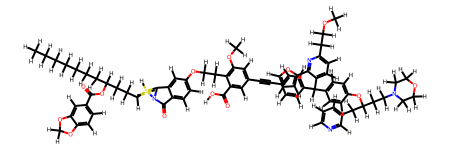

In [20]:
wrong_mol

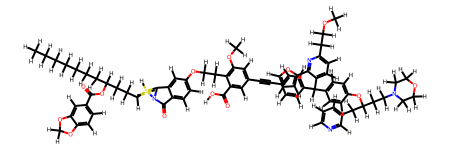

In [21]:
Chem.SanitizeMol(wrong_mol)
wrong_mol

In [22]:
AllChem.EmbedMolecule(wrong_mol,randomSeed=2023)

[19:11:47] 

****
Invariant Violation
upper bound not greater than lower bound
Violation occurred on line 186 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
Failed Expression: ub > lb
****



RuntimeError: Invariant Violation
	upper bound not greater than lower bound
	Violation occurred on line 186 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
	Failed Expression: ub > lb
	RDKIT: 2022.09.1
	BOOST: 1_78


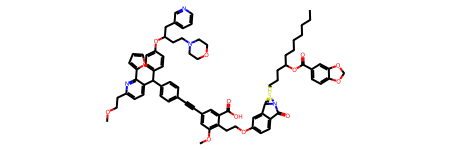

In [23]:
wrong_mm = Chem.RemoveHs(wrong_mol)
wrong_mm

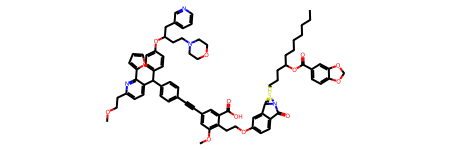

In [26]:
Chem.SanitizeMol(wrong_mm)
wrong_mm

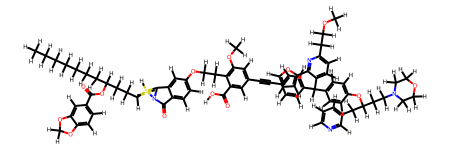

In [27]:
wrong_mol = Chem.AddHs(wrong_mm)
wrong_mol

In [28]:
AllChem.EmbedMolecule(wrong_mol,randomSeed=2023)

[20:57:35] 

****
Invariant Violation
upper bound not greater than lower bound
Violation occurred on line 186 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
Failed Expression: ub > lb
****



RuntimeError: Invariant Violation
	upper bound not greater than lower bound
	Violation occurred on line 186 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
	Failed Expression: ub > lb
	RDKIT: 2022.09.1
	BOOST: 1_78
